In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pylab
import seaborn as sns
import os
from os import path
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from scipy.cluster.hierarchy import fcluster, fclusterdata, linkage, dendrogram 
import matplotlib.patches as patches
from copy import deepcopy
import pickle
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# common formatting
plt.style.use('../synthetic-enhancer-footprinting.mplstyle')

import sys  
sys.path.insert(0, '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/code/amplicon-smf/workflow/scripts')

import common

import importlib
importlib.reload(common)
%matplotlib inline

import matplotlib.font_manager

flow_head = '/oak/stanford/groups/wjg/jschaepe/projects/smf/synthetic-enhancer-footprinting-flow-data/'
flow_df_head = flow_head + 'flow_dfs/'
thresh_head = flow_head + 'flow_dfs/Citrine_thresh/'
output_head = '/oak/stanford/groups/wjg/jschaepe/projects/smf/synthetic-enhancer-footprinting-outputs/'
smf_table = '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/data/all_smf_experiments_aggregator/231108_all_smf_experiments.txt'

opJS4 = ['opJS4_0x_TetO_21bp_no_CG','opJS4_1x_TetO_21bp_no_CG','opJS4_2x_TetO_21bp_no_CG','opJS4_3x_TetO_21bp_no_CG','opJS4_4x_TetO_21bp_no_CG',
         'opJS4_5x_TetO_21bp_no_CG', 'opJS4_6x_TetO_21bp_no_CG','opJS4_7x_TetO_21bp_no_CG','opJS4_8x_TetO_21bp_no_CG']

opJS5 = ['opJS5_0xTetO_18bp_b1',
 'opJS5_0xTetO_18bp_b2',
 'opJS5_1xTetO_18bp_b1',
 'opJS5_1xTetO_18bp_b2',
 'opJS5_2xTetO_18bp_b1',
 'opJS5_2xTetO_18bp_b2',
 'opJS5_3xTetO_18bp_b1',
 'opJS5_3xTetO_18bp_b2',
 'opJS5_4xTetO_18bp_b1',
 'opJS5_4xTetO_18bp_b2',
 'opJS5_5xTetO_18bp_b1',
 'opJS5_5xTetO_18bp_b2',
 'opJS5_6xTetO_18bp_b1',
 'opJS5_6xTetO_18bp_b2',
 'opJS5_7xTetO_18bp_b1',
 'opJS5_7xTetO_18bp_b2',
 'opJS5_8xTetO_18bp_b1',
 'opJS5_8xTetO_18bp_b2',
 'opJS5_9xTetO_18bp_b1',
 'opJS5_9xTetO_18bp_b2']

TFBS_map = {'opJS4_0x_TetO_21bp_no_CG':0,'opJS4_1x_TetO_21bp_no_CG':1,'opJS4_2x_TetO_21bp_no_CG':2,'opJS4_3x_TetO_21bp_no_CG':3,'opJS4_4x_TetO_21bp_no_CG':4,
         'opJS4_5x_TetO_21bp_no_CG':5, 'opJS4_6x_TetO_21bp_no_CG':6,'opJS4_7x_TetO_21bp_no_CG':7,'opJS4_8x_TetO_21bp_no_CG':8,
           'opJS5_0xTetO_18bp_b1':0,
 'opJS5_0xTetO_18bp_b2':0,
 'opJS5_1xTetO_18bp_b1':1,
 'opJS5_1xTetO_18bp_b2':1,
 'opJS5_2xTetO_18bp_b1':2,
 'opJS5_2xTetO_18bp_b2':2,
 'opJS5_3xTetO_18bp_b1':3,
 'opJS5_3xTetO_18bp_b2':3,
 'opJS5_4xTetO_18bp_b1':4,
 'opJS5_4xTetO_18bp_b2':4,
 'opJS5_5xTetO_18bp_b1':5,
 'opJS5_5xTetO_18bp_b2':5,
 'opJS5_6xTetO_18bp_b1':6,
 'opJS5_6xTetO_18bp_b2':6,
 'opJS5_7xTetO_18bp_b1':7,
 'opJS5_7xTetO_18bp_b2':7,
 'opJS5_8xTetO_18bp_b1':8,
 'opJS5_8xTetO_18bp_b2':8,
 'opJS5_9xTetO_18bp_b1':9,
 'opJS5_9xTetO_18bp_b2':9}

background_map = {'opJS4_0x_TetO_21bp_no_CG':0,'opJS4_1x_TetO_21bp_no_CG':0,'opJS4_2x_TetO_21bp_no_CG':0,'opJS4_3x_TetO_21bp_no_CG':0,'opJS4_4x_TetO_21bp_no_CG':0,
         'opJS4_5x_TetO_21bp_no_CG':0, 'opJS4_6x_TetO_21bp_no_CG':0,'opJS4_7x_TetO_21bp_no_CG':0,'opJS4_8x_TetO_21bp_no_CG':0,
           'opJS5_0xTetO_18bp_b1':1,
 'opJS5_0xTetO_18bp_b2':2,
 'opJS5_1xTetO_18bp_b1':1,
 'opJS5_1xTetO_18bp_b2':2,
 'opJS5_2xTetO_18bp_b1':1,
 'opJS5_2xTetO_18bp_b2':2,
 'opJS5_3xTetO_18bp_b1':1,
 'opJS5_3xTetO_18bp_b2':2,
 'opJS5_4xTetO_18bp_b1':1,
 'opJS5_4xTetO_18bp_b2':2,
 'opJS5_5xTetO_18bp_b1':1,
 'opJS5_5xTetO_18bp_b2':2,
 'opJS5_6xTetO_18bp_b1':1,
 'opJS5_6xTetO_18bp_b2':2,
 'opJS5_7xTetO_18bp_b1':1,
 'opJS5_7xTetO_18bp_b2':2,
 'opJS5_8xTetO_18bp_b1':1,
 'opJS5_8xTetO_18bp_b2':2,
 'opJS5_9xTetO_18bp_b1':1,
 'opJS5_9xTetO_18bp_b2':2}

fontsize=8
markersize=20
legend_fontsize = 6
tick_fontsize=6

In [64]:
# reading in dataframes
summary_df = pd.read_table(smf_table)
summary_df['TFBS'] = summary_df['amplicon'].map(TFBS_map)
summary_df['background'] = summary_df['amplicon'].map(background_map)

In [67]:
# subsetting smf dataframe
amplicons = opJS4 + opJS5
smf_df = summary_df[summary_df['amplicon'].isin(amplicons)][
                        summary_df['dox']==True][
                        summary_df['dox_conc']==1000][
                        summary_df['dox_time_min']==24*60][
                        summary_df['drug'].isna()][
                        summary_df['effector'].isna()][
                        summary_df['pool']=='opJS45']
df = smf_df

<ipython-input-67-252f3061f1d1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smf_df = summary_df[summary_df['amplicon'].isin(amplicons)][


<ipython-input-70-1d295e5deb81>:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(1+1/((n_tf)*k_fast_r))


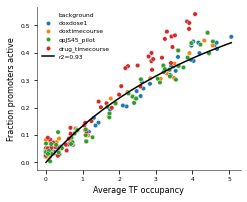

In [70]:
# all datapoints across experiments - shows that drug timecourse needs separate fit
# plotting against the average 
def parallel(n_tf, k_fast_r):
    return 1/(1+1/((n_tf)*k_fast_r))

# fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
fig, ax = plt.subplots(figsize=(4,3))

background_colors = ['k','#525252','#969696']

# sns.scatterplot(data = df, x = 'avg_tf_bound', y = 'promoter_active', hue='background', palette=background_colors,s = markersize, ax =ax, color='k')
sns.scatterplot(data = df, x = 'avg_tf_bound', y = 'promoter_active', hue='experiment_name',s = markersize, ax =ax, color='k')

ax.set_ylabel('Fraction promoters active', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Average TF occupancy', fontsize = fontsize)
ax.set_box_aspect(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')
    
x = np.linspace(0,max(df['avg_tf_bound']), 100)
plt.plot(x, parallel(x, *popt), color='k', label='r2={}'.format(np.around(r2_score(df['promoter_active'], parallel(np.asarray(df['avg_tf_bound']),*popt)),2)))
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='background', title_fontsize=legend_fontsize)
# plt.savefig(output_head+'fig3_plots/MFI_vs_promoter_backgrounds.pdf', dpi=300)

In [73]:
# subsetting smf dataframe
amplicons = opJS4 + opJS5
smf_df = summary_df[summary_df['amplicon'].isin(amplicons)][
                        summary_df['dox']==True][
                        summary_df['dox_conc']==1000][
                        summary_df['dox_time_min']==24*60][
                        summary_df['drug'].isna()][
                        summary_df['effector'].isna()][
                        summary_df['pool']=='opJS45'][
                        ~summary_df['experiment_name'].isin([ 'drug_timecourse'])]
df = smf_df

<ipython-input-73-f4712802ecbb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smf_df = summary_df[summary_df['amplicon'].isin(amplicons)][


<ipython-input-77-b1337836d2a6>:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(1+1/((n_tf)*k_fast_r))


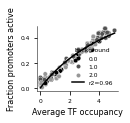

In [77]:
# all datapoints subset of experiments
# plotting against the average 
def parallel(n_tf, k_fast_r):
    return 1/(1+1/((n_tf)*k_fast_r))

fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))

background_colors = ['k','#525252','#969696']

sns.scatterplot(data = df, x = 'avg_tf_bound', y = 'promoter_active', hue='background', palette=background_colors,s = markersize, ax =ax, color='k')
# sns.scatterplot(data = df, x = 'avg_tf_bound', y = 'promoter_active', hue='experiment_name',s = markersize, ax =ax, color='k')

ax.set_ylabel('Fraction promoters active', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Average TF occupancy', fontsize = fontsize)
ax.set_box_aspect(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

popt, pcov = curve_fit(parallel, df['avg_tf_bound'], df['promoter_active'])
file_path = output_head + 'TF_to_promoter_params.txt'
with open(file_path, 'w') as file:
    # Write popt and pcov to file
    file.write(str(popt))
    file.write('\n')
    file.write(str(popt))
    
x = np.linspace(0,max(df['avg_tf_bound']), 100)
plt.plot(x, parallel(x, *popt), color='k', label='r2={}'.format(np.around(r2_score(df['promoter_active'], parallel(np.asarray(df['avg_tf_bound']),*popt)),2)))
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='background', title_fontsize=legend_fontsize)
plt.savefig(output_head+'fig3_plots/promoter_vs_avgTF_backgrounds_subset.pdf', dpi=300)